<a href="https://colab.research.google.com/github/shumshersubashgautam/Computer-Aided-Drug-Discovery-Learning/blob/main/2_3_Molecular_filtering_Compound_unwanted_substructures_ADME_and_lead_likeness_criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/volkamerlab/teachopencadd.git

Cloning into 'teachopencadd'...
remote: Enumerating objects: 17115, done.
remote: Counting objects: 100% (2093/2093), done.
remote: Compressing objects: 100% (969/969), done.
remote: Total 17115 (delta 1309), reused 1786 (delta 1122), pack-reused 15022
Receiving objects: 100% (17115/17115), 849.77 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (11506/11506), done.
Updating files: 100% (468/468), done.


In [3]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 45.8 MB/s eta 0:00:00


# **Contents in Theory**
ADME - absorption, distribution, metabolism, and excretion
Lead-likeness and Lipinski's rule of five (Ro5)
Radar charts in the context of lead-likeness
Contents in Practical
Define and visualize example molecules
Calculate and plot molecular properties for Ro5
Investigate compliance with Ro5
Apply Ro5 to the EGFR dataset
Visualize Ro5 properties (radar plot)
References
ADME criteria (Wikipedia and Mol Pharm. (2010), 7(5), 1388-1405)
SwissADME webserver
What are lead compounds? (Wikipedia)
What is the LogP value? (Wikipedia)
Lipinski et al. "Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings." (Adv. Drug Deliv. Rev. (1997), 23, 3-25)
Ritchie et al. "Graphical representation of ADME-related molecule properties for medicinal chemists" (Drug. Discov. Today (2011), 16, 65-72)
Theory
In a virtual screening, we aim to predict whether a compound might bind to and interact with a specific target. However, if we want to identify a new drug, it is also important that this compound reaches the target and is eventually removed from the body in a favorable way. Therefore, we should also consider whether a compound is actually taken up into the body and whether it is able to cross certain barriers in order to reach its target. Is it metabolically stable and how will it be excreted once it is not acting at the target anymore? These processes are investigated in the field of pharmacokinetics. In contrast to pharmacodynamics ("What does the drug do to our body?"), pharmacokinetics deals with the question "What happens to the drug in our body?".

ADME - absorption, distribution, metabolism, and excretion
Pharmacokinetics are mainly divided into four steps: Absorption, Distribution, Metabolism, and Excretion. These are summarized as ADME. Often, ADME also includes Toxicology and is thus referred to as ADMET or ADMETox. Below, the ADME steps are discussed in more detail (Wikipedia and Mol Pharm. (2010), 7(5), 1388-1405).

Absorption: The amount and the time of drug-uptake into the body depends on multiple factors which can vary between individuals and their conditions as well as on the properties of the substance. Factors such as (poor) compound solubility, gastric emptying time, intestinal transit time, chemical (in-)stability in the stomach, and (in-)ability to permeate the intestinal wall can all influence the extent to which a drug is absorbed after e.g. oral administration, inhalation, or contact to skin.

Distribution: The distribution of an absorbed substance, i.e. within the body, between blood and different tissues, and crossing the blood-brain barrier are affected by regional blood flow rates, molecular size and polarity of the compound, and binding to serum proteins and transporter enzymes. Critical effects in toxicology can be the accumulation of highly apolar substances in fatty tissue, or crossing of the blood-brain barrier.

Metabolism: After entering the body, the compound will be metabolized. This means that only part of this compound will actually reach its target. Mainly liver and kidney enzymes are responsible for the break-down of xenobiotics (substances that are extrinsic to the body).

Excretion: Compounds and their metabolites need to be removed from the body via excretion, usually through the kidneys (urine) or in the feces. Incomplete excretion can result in accumulation of foreign substances or adverse interference with normal metabolism.

ADME processes in the human body

Figure 1: ADME processes in the human body (figure taken from Openclipart and adapted).

Lead-likeness and Lipinski's rule of five (Ro5)
Lead compounds are developmental drug candidates with promising properties. They are used as starting structures and modified with the aim to develop effective drugs. Besides bioactivity (compound binds to the target of interest), also favorable ADME properties are important criteria for the design of efficient drugs.

The bioavailability of a compound is an important ADME property. Lipinski's rule of five (Ro5, Adv. Drug Deliv. Rev. (1997), 23, 3-25) was introduced to estimate the bioavailability of a compound solely based on its chemical structure. The Ro5 states that poor absorption or permeation of a compound is more probable if the chemical structure violates more than one of the following rules:

Molecular weight (MWT) <= 500 Da
Number of hydrogen bond acceptors (HBAs) <= 10
Number of hydrogen bond donors (HBD) <= 5
Calculated LogP (octanol-water coefficient) <= 5
Note: All numbers in the Ro5 are multiples of five; this is the origin of the rule's name.

Additional remarks:

LogP is also called partition coefficient or octanol-water coefficient. It measures the distribution of a compound, usually between a hydrophobic (e.g. 1-octanol) and a hydrophilic (e.g. water) phase.
Hydrophobic molecules might have a reduced solubility in water, while more hydrophilic molecules (e.g. high number of hydrogen bond acceptors and donors) or large molecules (high molecular weight) might have more difficulties in passing phospholipid membranes.
Radar charts in the context of lead-likeness
Molecular properties, such as the Ro5 properties, can be visualized in multiple ways (e.g. craig plots, flower plots, or golden triangle) to support the interpretation by medicinal chemists (Drug. Discov. Today (2011), 16(1-2), 65-72).

Due to their appearance, radar charts are sometimes also called "spider" or "cobweb" plots. They are arranged circularly in 360 degrees and have one axis, starting in the center, for each condition. The values for each parameter are plotted on the axis and connected with a line. A shaded area can indicate the region where the parameters meet the conditions.

Radar plot for physicochemical properties

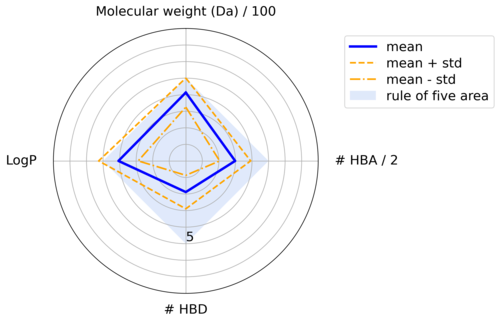

Figure 2: Radar plot displaying physico-chemical properties of a compound dataset

In [20]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [21]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

Define and visualize example molecules
Before working with the whole dataset retrieved from ChEMBL, we pick four example compounds to investigate their chemical properties. We draw four example molecules from their SMILES.

In [23]:
smiles = [
    "CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C",
    "CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O",
]
names = ["cyclosporine", "clozapine", "beta-carotene", "cannabidiol"]

First, we combine the names and SMILES of the molecules, together with their structure, in a DataFrame.

,name,smiles,ROMol
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,

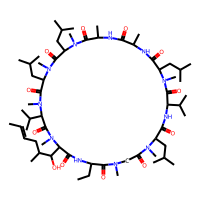
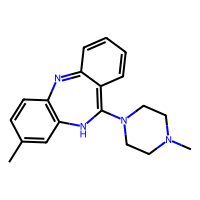
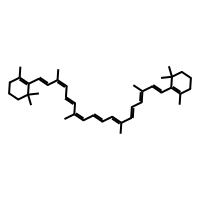
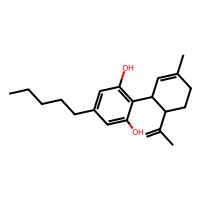

In [24]:
molecules = pd.DataFrame({"name": names, "smiles": smiles})
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")
molecules

# **Calculate and plot molecular properties for Ro5**
Calculate molecular weight, number of hydrogen bond acceptors and donors, and logP using some of the descriptors available in rdkit.

In [25]:
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)
# Colors are used for plotting the molecules later
molecules["color"] = ["red", "green", "blue", "cyan"]
# NBVAL_CHECK_OUTPUT
molecules[["molecular_weight", "n_hba", "n_hbd", "logp"]]

,molecular_weight,n_hba,n_hbd,logp
0,1201.841368,12,5,3.26900
1,306.184447,4,1,1.68492
2,536.438202,0,0,12.60580
3,314.224580,2,2,5.84650


,name,smiles,ROMol,molecular_weight,n_hba,n_hbd,logp,color
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,,1201.841368,12,5,3.26900,red
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,,306.184447,4,1,1.68492,green
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,,536.438202,0,0,12.60580,blue
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,,314.224580,2,2,5.84650,cyan

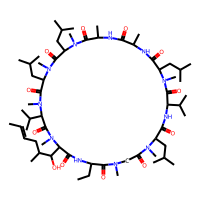
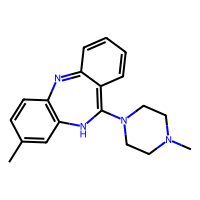
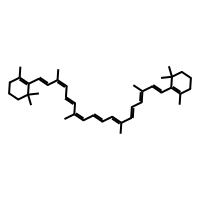
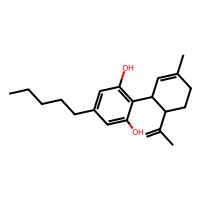

In [26]:
# Full preview
molecules

2.Plot the molecule properties as bar plots.

In [27]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

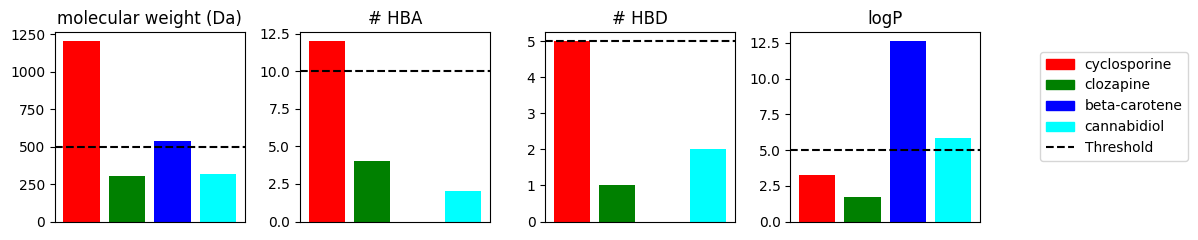

In [28]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(molecules) + 1)
colors = ["red", "green", "blue", "cyan"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([1, 2, 3, 4], molecules[key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [
    mpatches.Patch(color=row["color"], label=row["name"]) for index, row in molecules.iterrows()
]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()


In the bar chart, we compared the Ro5 properties for four example molecules with different properties. In the next steps, we will investigate for each compound whether it violates the Ro5.

**Investigate compliance with Ro5**

In [29]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [30]:
# NBVAL_CHECK_OUTPUT
for name, smiles in zip(molecules["name"], molecules["smiles"]):
    print(f"Ro5 fulfilled for {name}: {calculate_ro5_properties(smiles)['ro5_fulfilled']}")

Ro5 fulfilled for cyclosporine: False
Ro5 fulfilled for clozapine: True
Ro5 fulfilled for beta-carotene: False
Ro5 fulfilled for cannabidiol: True


According to the Ro5, cyclosporin and betacarotene are estimated to have poor bioavailability. However, since all of them are approved drugs, they are good examples of how the Ro5 can be used as an alert but should not necessarily be used as a filter.

# **Apply Ro5 to the EGFR dataset**
The calculate_ro5_properties function can be applied to the EGFR dataset for Ro5-compliant compounds.

In [32]:
molecules = pd.read_csv(HERE / "/content/teachopencadd/teachopencadd/talktorials/T002_compound_adme/data/EGFR_compounds_lipinski.csv", index_col=0)
print(molecules.shape)
molecules.head()

(4635, 10)


,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.2891,True
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.9333,True
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.5969,True
3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.0122,True
4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.5726,True


In [48]:
#Apply the Ro5 to all molecules.
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,349.021459,3,1,5.2891,True
1,387.058239,5,1,4.9333,True
2,343.043258,5,1,3.5969,True
3,339.011957,4,2,4.0122,True
4,329.027607,5,2,3.5726,True


In [53]:
#Concatenate molecules with Ro5 data.
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules=molecules.reset_index(drop=True)
molecules.head()

,level_0,index,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,...,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,0,0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,...,349.021459,3,1,5.2891,True,349.021459,3,1,5.2891,True
1,1,1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,...,387.058239,5,1,4.9333,True,387.058239,5,1,4.9333,True
2,2,2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,...,343.043258,5,1,3.5969,True,343.043258,5,1,3.5969,True
3,3,3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,...,339.011957,4,2,4.0122,True,339.011957,4,2,4.0122,True
4,4,4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,...,329.027607,5,2,3.5726,True,329.027607,5,2,3.5726,True


In [44]:
#molecules[molecules.index.duplicated()]

In [58]:
molecules.columns.duplicated().any()

True

In [65]:
molecules.loc[:,~molecules.columns.duplicated()]

,level_0,index,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,0,0,CHEMBL63786,3.000000e-03,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.28910,True
1,1,1,CHEMBL35820,6.000000e-03,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.93330,True
2,2,2,CHEMBL53711,6.000000e-03,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.59690,True
3,3,3,CHEMBL66031,8.000000e-03,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.01220,True
4,4,4,CHEMBL53753,8.000000e-03,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.57260,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4630,4630,5562,CHEMBL120564,2.600000e+06,nM,COc1cc(C=C(C#N)C#N)cc(C)c1O,2.585027,214.074228,4,1,2.13978,True
4631,4631,5563,CHEMBL66879,3.000000e+06,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879,164.047344,2,2,1.49000,True
4632,4632,5564,CHEMBL261238,5.000000e+06,nM,CN(c1cccnc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1,2.301030,404.095250,6,1,5.20048,True
4633,4633,5565,CHEMBL76587,6.500000e+06,nM,N#CC(C#N)Cc1ccc(O)cc1,2.187087,172.063663,3,1,1.59806,True


# **Molecular filtering: unwanted substructures**

Authors:

Maximilian Driller, CADD seminar, 2017, Charité/FU Berlin
Sandra Krüger, CADD seminar, 2018, Charité/FU Berlin
Talktorial T003: This talktorial is part of the TeachOpenCADD pipeline described in the first TeachOpenCADD publication (J. Cheminform. (2019), 11, 1-7), comprising of talktorials T001-T010.

Aim of this talktorial
There are some substructures we prefer not to include into our screening library. In this talktorial, we learn about different types of such unwanted substructures and how to find, highlight and remove them with RDKit.

Contents in Theory
Unwanted substructures
Pan Assay Interference Compounds (PAINS)
Contents in Practical
Load and visualize data
Filter for PAINS
Filter for unwanted substructures
Highlight substructures
Substructure statistics
References
Pan Assay Interference compounds (wikipedia, J. Med. Chem. (2010), 53, 2719-2740)
Unwanted substructures according to Brenk et al. (Chem. Med. Chem. (2008), 3, 435-44)
Inspired by a Teach-Discover-Treat tutorial (repository)
RDKit (repository, documentation)
Theory
Unwanted substructures
Substructures can be unfavorable, e.g., because they are toxic or reactive, due to unfavorable pharmacokinetic properties, or because they likely interfere with certain assays. Nowadays, drug discovery campaigns often involve high throughput screening. Filtering unwanted substructures can support assembling more efficient screening libraries, which can save time and resources.

Brenk et al. (Chem. Med. Chem. (2008), 3, 435-44) have assembled a list of unfavorable substructures to filter their libraries used to screen for compounds to treat neglected diseases. Examples of such unwanted features are nitro groups (mutagenic), sulfates and phosphates (likely resulting in unfavorable pharmacokinetic properties), 2-halopyridines and thiols (reactive). This list of undesired substructures was published in the above mentioned paper and will be used in the practical part of this talktorial.

Pan Assay Interference Compounds (PAINS)
PAINS are compounds that often occur as hits in HTS even though they actually are false positives. PAINS show activity at numerous targets rather than one specific target. Such behavior results from unspecific binding or interaction with assay components. Baell et al. (J. Med. Chem. (2010), 53, 2719-2740) focused on substructures interfering in assay signaling. They described substructures which can help to identify such PAINS and provided a list which can be used for substructure filtering.

PAINS
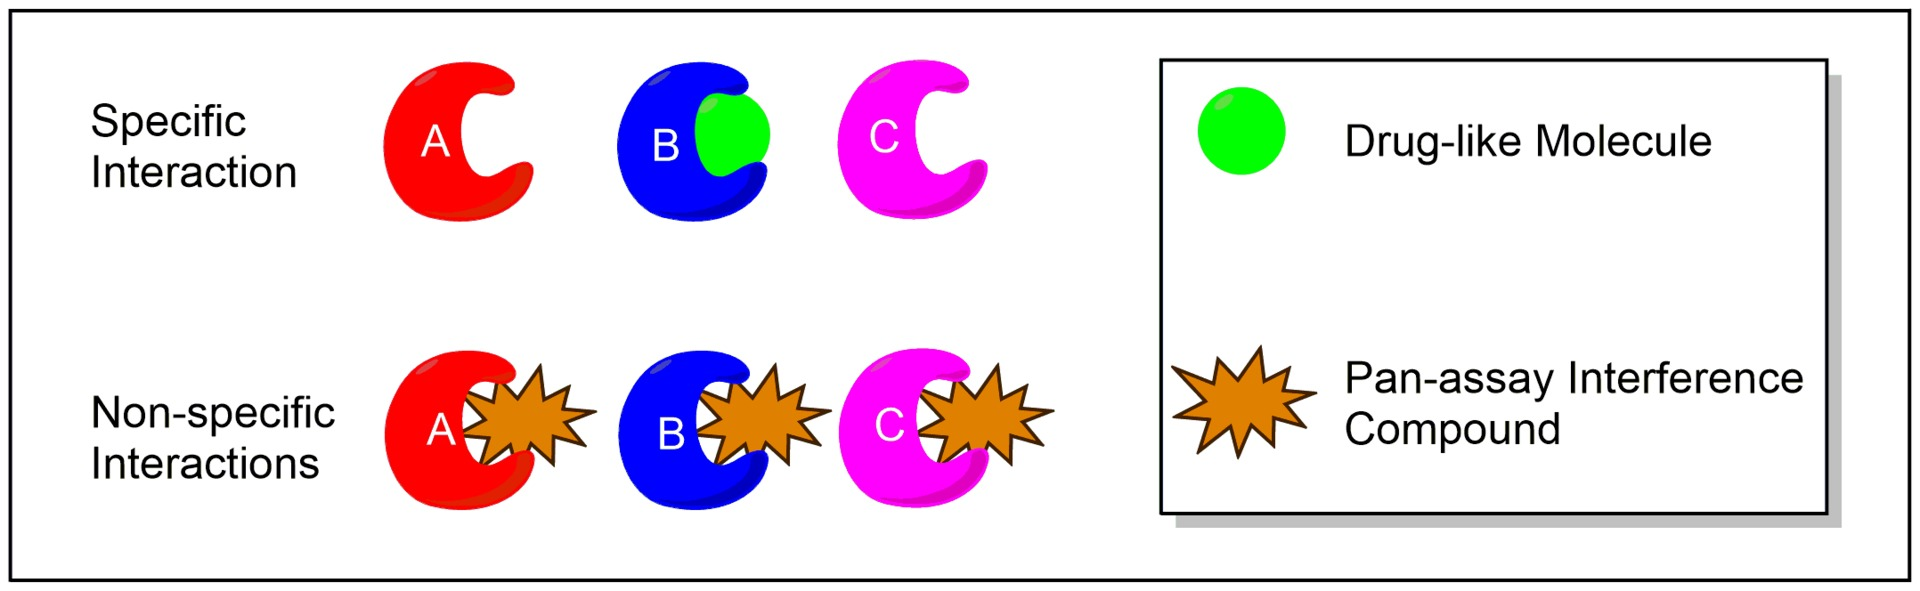


Fig : Specific and unspecific binding in the context of PAINS. Figure taken from Wikipedia.

# **Load and visualize data**
First, we import the required libraries, load our filtered dataset from Talktorial T002 and draw the first molecules.

In [71]:
from pathlib import Path

import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

In [72]:
# define paths
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [73]:
# load data from Talktorial T2
egfr_data = pd.read_csv(
    HERE / "/content/teachopencadd/teachopencadd/talktorials/T002_compound_adme/data/EGFR_compounds_lipinski.csv",
    index_col=0,
)
# Drop unnecessary information
print("Dataframe shape:", egfr_data.shape)
egfr_data.drop(columns=["molecular_weight", "n_hbd", "n_hba", "logp"], inplace=True)
egfr_data.head()

Dataframe shape: (4635, 10)


,molecule_chembl_id,IC50,units,smiles,pIC50,ro5_fulfilled
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,True
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,True
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,True
3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,True
4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,True


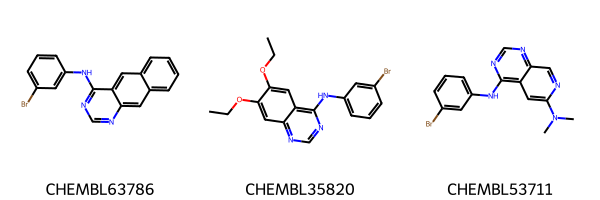

In [74]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(egfr_data, smilesCol="smiles")
# Draw first 3 molecules
Chem.Draw.MolsToGridImage(
    list(egfr_data.head(3).ROMol),
    legends=list(egfr_data.head(3).molecule_chembl_id),
)

# **Filter for PAINS**
The PAINS filter is already implemented in RDKit (documentation). Such pre-defined filters can be applied via the FilterCatalog class. Let's learn how it can be used.

In [75]:
# initialize filter
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)

In [76]:
# search for PAINS
matches = []
clean = []
for index, row in tqdm(egfr_data.iterrows(), total=egfr_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.smiles)
    entry = catalog.GetFirstMatch(molecule)  # Get the first matching PAINS
    if entry is not None:
        # store PAINS information
        matches.append(
            {
                "chembl_id": row.molecule_chembl_id,
                "rdkit_molecule": molecule,
                "pains": entry.GetDescription().capitalize(),
            }
        )
    else:
        # collect indices of molecules without PAINS
        clean.append(index)

matches = pd.DataFrame(matches)
egfr_data = egfr_data.loc[clean]  # keep molecules without PAINS

  0%|          | 0/4635 [00:00<?, ?it/s]

In [77]:
# NBVAL_CHECK_OUTPUT
print(f"Number of compounds with PAINS: {len(matches)}")
print(f"Number of compounds without PAINS: {len(egfr_data)}")

Number of compounds with PAINS: 408
Number of compounds without PAINS: 4227


Let's have a look at the first 3 identified PAINS.

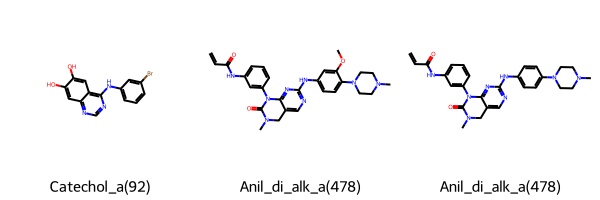

In [78]:
Chem.Draw.MolsToGridImage(
    list(matches.head(3).rdkit_molecule),
    legends=list(matches.head(3)["pains"]),
)

# **Filter and highlight unwanted substructures**
Some lists of unwanted substructures, like PAINS, are already implemented in RDKit. However, it is also possible to use an external list and get the substructure matches manually. Here, we use the list provided in the supporting information from Brenk et al. (Chem. Med. Chem. (2008), 3, 535-44).

In [80]:
substructures = pd.read_csv(DATA / "/content/teachopencadd/teachopencadd/talktorials/T003_compound_unwanted_substructures/data/unwanted_substructures.csv", sep="\s+")
substructures["rdkit_molecule"] = substructures.smarts.apply(Chem.MolFromSmarts)
print("Number of unwanted substructures in collection:", len(substructures))
# NBVAL_CHECK_OUTPUT

Number of unwanted substructures in collection: 104


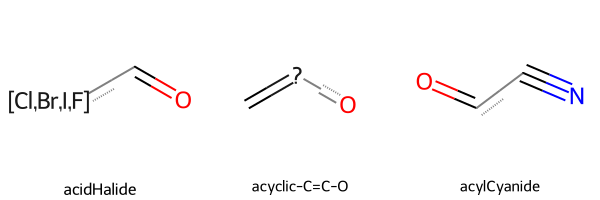

In [81]:
#looking at some few substructures
Chem.Draw.MolsToGridImage(
    mols=substructures.rdkit_molecule.tolist()[2:5],
    legends=substructures.name.tolist()[2:5],
)

Search our filtered dataframe for matches with these unwanted substructures.

In [82]:
# search for unwanted substructure
matches = []
clean = []
for index, row in tqdm(egfr_data.iterrows(), total=egfr_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.smiles)
    match = False
    for _, substructure in substructures.iterrows():
        if molecule.HasSubstructMatch(substructure.rdkit_molecule):
            matches.append(
                {
                    "chembl_id": row.molecule_chembl_id,
                    "rdkit_molecule": molecule,
                    "substructure": substructure.rdkit_molecule,
                    "substructure_name": substructure["name"],
                }
            )
            match = True
    if not match:
        clean.append(index)

matches = pd.DataFrame(matches)
egfr_data = egfr_data.loc[clean]

  0%|          | 0/4227 [00:00<?, ?it/s]

In [83]:
# NBVAL_CHECK_OUTPUT
print(f"Number of found unwanted substructure: {len(matches)}")
print(f"Number of compounds without unwanted substructure: {len(egfr_data)}")

Number of found unwanted substructure: 3232
Number of compounds without unwanted substructure: 2089


# Highlight substructures
Let's have a look at the first 3 identified unwanted substructures. Since we have access to the underlying SMARTS patterns we can highlight the substructures within the RDKit molecules.

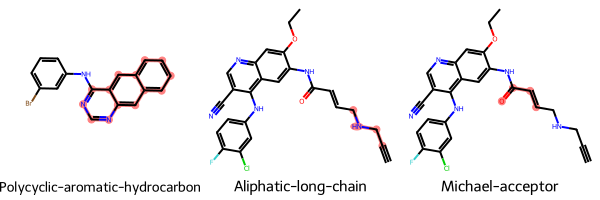

In [84]:
to_highlight = [
    row.rdkit_molecule.GetSubstructMatch(row.substructure) for _, row in matches.head(3).iterrows()
]
Chem.Draw.MolsToGridImage(
    list(matches.head(3).rdkit_molecule),
    highlightAtomLists=to_highlight,
    legends=list(matches.head(3).substructure_name),
)

# **Substructure statistics**
Finally, we want to find the most frequent substructure found in our data set. The Pandas DataFrame provides convenient methods to group containing data and to retrieve group sizes.

In [85]:
# NBVAL_CHECK_OUTPUT
groups = matches.groupby("substructure_name")
group_frequencies = groups.size()
group_frequencies.sort_values(ascending=False, inplace=True)
group_frequencies.head(10)

substructure_name
Michael-acceptor               1113
Aliphatic-long-chain            489
Oxygen-nitrogen-single-bond     367
triple-bond                     252
nitro-group                     177
imine                           150
Thiocarbonyl-group              114
aniline                          64
halogenated-ring                 62
conjugated-nitrile-group         59
dtype: int64

# **Discussion**
In this talktorial learned two possibilities to perform a search for unwanted substructures with RDKit:

The FilterCatalog class can be used to search for predefined collections of substructures, e.g., PAINS.
The HasSubstructMatch() function to perform manual substructure searches.
Actually, PAINS filtering could also be implemented via manual substructure searches with HasSubstructMatch(). Furthermore, the substructures defined by Brenk et al. (Chem. Med. Chem. (2008), 3, 535-44) are already implemented as a FilterCatalog. Additional pre-defined collections can be found in the RDKit documentation.

So far, we have been using the HasSubstructMatch() function, which only yields one match per compound. With the GetSubstructMatches() function (documentation) we have the opportunity to identify all occurrences of a particular substructure in a compound. In case of PAINS, we have only looked at the first match per molecule (GetFirstMatch()). If we simply want to filter out all PAINS this is enough. However, we could also use GetMatches() in order to see all critical substructures of a molecule.

Detected substructures can be handled in two different fashions:

Either, the substructure search is applied as a filter and the compounds are excluded from further testing to save time and money.
Or, they can be used as warnings, since ~5 % of FDA-approved drugs were found to contain PAINS (ACS. Chem. Biol. (2018), 13, 36-44). In this case experts can judge manually, if an identified substructure is critical or not.